In [1]:
import librosa
import keras
import keras.layers as L
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import os
import random
import bisect

Using TensorFlow backend.


In [2]:
time_step = 5 #seconds
hop_len = 512
sr = 22050
model=keras.models.Sequential()
model.add(L.InputLayer(input_shape=(int(time_step*sr/(hop_len)),128)))#128,215)))
model.add(L.Conv1D(256,6, padding='same'))
model.add(L.Conv1D(256,3, padding='same'))
model.add(L.GlobalMaxPool1D())
model.add(L.Dense(512,activation='relu'))
model.add(L.Dense(256, activation='relu'))
model.add(L.Dense(128, activation='sigmoid'))
#model.add(L.GlobalMaxPool1D())

In [3]:
model.compile(optimizer='SGD',loss='binary_crossentropy')

In [109]:
model.load_weights("/home/jheuristic/data/weights/model1.wght")

In [5]:
def generate_for_test(spectrogram,startTime,time_step=5,hop_len = 512,sr = 22050):
    startSpectr= int(startTime*sr/(hop_len)) #int(startMid/(k*hop_len))
    stopSpectr=int(startSpectr+time_step*sr/(hop_len))
    
    out1 = spectrogram[:,startSpectr:stopSpectr].transpose().reshape(1,int(time_step*sr/(hop_len)),128)
    return out1

In [130]:
def generate_for_test2(spectrogram,startTime,time_step=5,hop_len = 512,sr = 22050):
    startSpectr= int(startTime*sr/(hop_len)) #int(startMid/(k*hop_len))
    stopSpectr=int(startSpectr+time_step*sr/(hop_len))
    
    out1 = spectrogram[:,startSpectr:stopSpectr].transpose().reshape(1,1,int(time_step*sr/(hop_len)),128)
    return out1

In [126]:
hjk,sr=librosa.load('/home/jheuristic/data/Untitled_819855_1.wav')
spectrogram = librosa.feature.melspectrogram(hjk,sr)

In [137]:
trac_len = len(spectrogram[0])*hop_len
notes = np.zeros((int(trac_len/(sr*time_step)),128))
#trac_len = len(spectrogram[0])*hop_len
#notes = np.zeros((int(trac_len/(sr*time_step)),128))
for i in range(int(trac_len/(sr*time_step))):
    notes[i]=model.predict(generate_for_test(spectrogram,i))

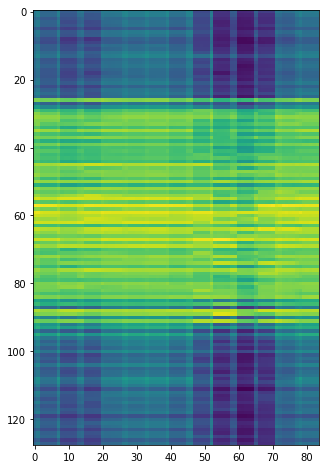

In [138]:
plt.figure(figsize=(24,8))
plt.imshow(notes.transpose())

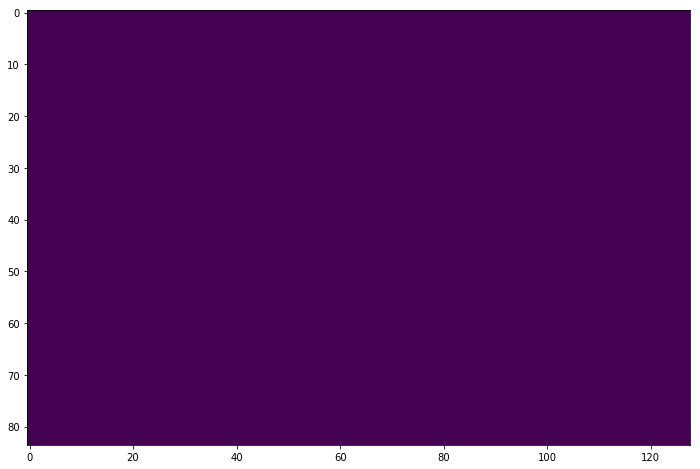

In [139]:
plt.figure(figsize=(24,8))
plt.imshow(notes > 0.5)

In [21]:
spectrogram = spectrogram.transpose()
spectrogram  = np.concatenate((spectrogram,spectrogram,spectrogram,spectrogram))

In [22]:
spectrogram = spectrogram.transpose()
spectrogram.shape

(128, 7488)

In [69]:
spectrogram=np.random.random(size=(128, 7488))

In [64]:
spectrogram-=1000

In [60]:
spectrogram[0][0] = 0

In [114]:
test,sr=librosa.load('/home/jheuristic/data/Not_recognizeable.wav')
spectrogram = librosa.feature.melspectrogram(test,sr)

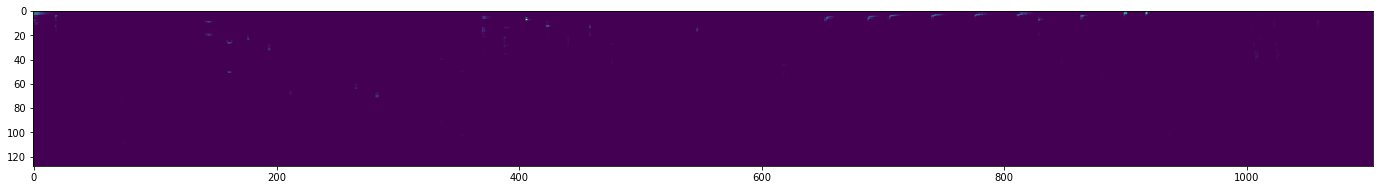

In [122]:
plt.figure(figsize=(24,8))
plt.imshow(spectrogram)

In [121]:
np.min(spectrogram)

-5.0

In [123]:
time_step = 5 #seconds
hop_len = 512
sr = 22050
model2=keras.models.Sequential()
model2.add(L.InputLayer(input_shape=(1,int(time_step*sr/(hop_len)),128)))#128,215)))
model2.add(L.Conv2D(256,(6,6), padding='same'))
model2.add(L.Conv2D(256,(3,3), padding='same'))
model2.add(L.GlobalMaxPool2D())
model2.add(L.Dense(512,activation='relu'))
model2.add(L.Dense(256, activation='relu'))
model2.add(L.Dense(128, activation='sigmoid'))
#model.add(L.GlobalMaxPool1D())

In [124]:
model2.compile(optimizer='SGD',loss='binary_crossentropy')

In [125]:
model2.load_weights("/home/jheuristic/data/weights/model2.wght")

In [140]:
trac_len = len(spectrogram[0])*hop_len
notes = np.zeros((int(trac_len/(sr*time_step)),128))
#trac_len = len(spectrogram[0])*hop_len
#notes = np.zeros((int(trac_len/(sr*time_step)),128))
for i in range(int(trac_len/(sr*time_step))):
    notes[i]=model2.predict(generate_for_test2(spectrogram,i))

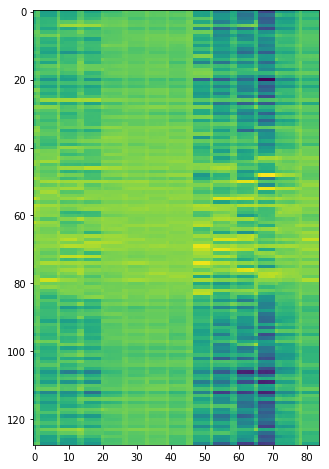

In [141]:
plt.figure(figsize=(24,8))
plt.imshow(notes.transpose())

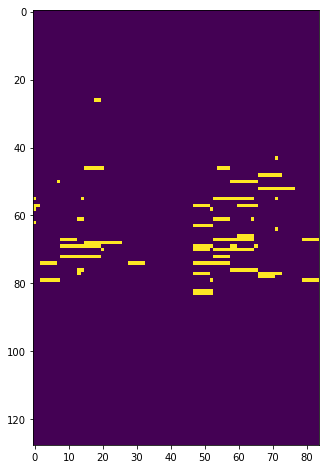

In [142]:
plt.figure(figsize=(24,8))
plt.imshow(notes.transpose() > 0.5)